In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# Cargar los datos
data = pd.read_csv(r'C:\Users\CINDY\Downloads\archive\CAR DETAILS FROM CAR DEKHO.csv')

In [17]:
# Verificar tipos de datos
print(data.dtypes)

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [18]:
# Asegurarse de que 'km_driven' sea una cadena y manejar valores nulos
data['km_driven'] = data['km_driven'].fillna('0 km').astype(str)

In [19]:
# Limpiar la columna 'km_driven'
data['km_driven'] = data['km_driven'].str.replace(' km', '').str.replace(',', '').astype(float)
print(data.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000    70000.0  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000    50000.0  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000   100000.0  Diesel   
3    Datsun RediGO T Option  2017         250000    46000.0  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000   141000.0  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [20]:
# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'name'], drop_first=True)

In [21]:
# Definir las variables independientes (X) y dependientes (y)
X = data[['year', 'km_driven'] + [col for col in data.columns if 'fuel_' in col] + 
          [col for col in data.columns if 'seller_type_' in col] + 
          [col for col in data.columns if 'transmission_' in col] + 
          [col for col in data.columns if 'name_' in col]]

y = data['selling_price']


In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Realizar predicciones
predictions = model.predict(X_test)

In [27]:
# Mostrar algunas predicciones
y_pred = model.predict(X_test)

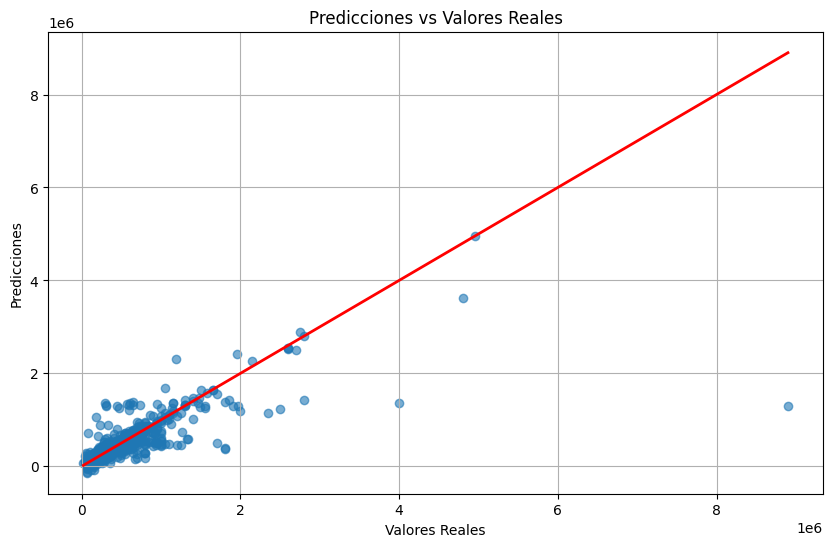

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Línea ideal
plt.grid()
plt.show()